In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

None


### Análisis del Dataset ###

Número de filas y columnas: (20718, 28)

Resumen estadístico de las variables numéricas:


,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09



Valores nulos en el dataset:


Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

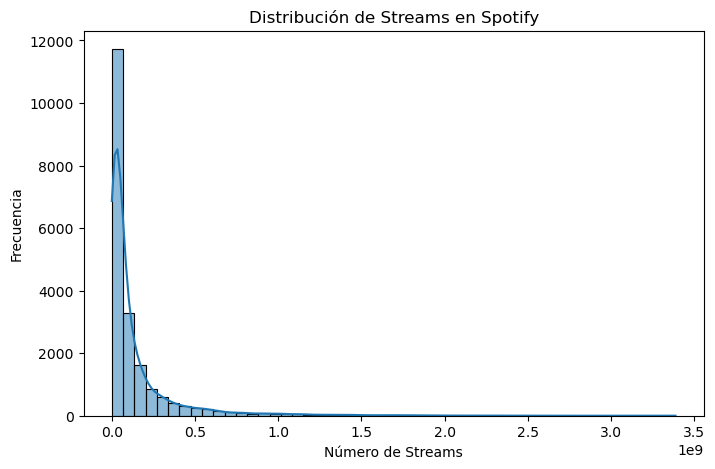

In [25]:
path = "Spotify_Youtube.csv"

df = pd.read_csv(path)

display(df.head())
display(df.info())

print("\n### Análisis del Dataset ###\n")
print("Número de filas y columnas:", df.shape)
print("\nResumen estadístico de las variables numéricas:")
display(df.describe())

print("\nValores nulos en el dataset:")
display(df.isnull().sum())

plt.figure(figsize=(8, 5))
sns.histplot(df["Stream"], bins=50, kde=True)
plt.xlabel("Número de Streams")
plt.ylabel("Frecuencia")
plt.title("Distribución de Streams en Spotify")
plt.show()

### Paso 2: [Problem definition] Evaluar si el problema es de regresión o clasificación, clusterización, o predicción de series temporales.
### - Explicar cuales son las variables de entrada y salida.
### - ¿Es posible resolver dicho problema de forma eficiente sin recurrir a inteligencia artificial?

In [30]:
# Umbral de éxito en 100 millones de streams

threshold = 100_000_000
df["Success"] = (df["Stream"] >= threshold).astype(int)

print("\n### Definición del Problema ###\n")
print("Tipo de problema: Clasificación binaria")
print("Variable de salida: Success (1 = Éxito, 0 = No Éxito)")
print("Variables de entrada: Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms, Likes, Comments")
print("\n¿Es posible resolver sin IA?:")
print("Podría intentarse con reglas basadas en umbrales simples, pero sería menos eficiente debido a la cantidad de variables y su interacción. Machine Learning es una mejor opción.")


### Definición del Problema ###

Tipo de problema: Clasificación binaria
Variable de salida: Success (1 = Éxito, 0 = No Éxito)
Variables de entrada: Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms, Likes, Comments

¿Es posible resolver sin IA?:
Podría intentarse con reglas basadas en umbrales simples, pero sería menos eficiente debido a la cantidad de variables y su interacción. Machine Learning es una mejor opción.


### Paso 3: Preparación de datos

In [36]:
# Seleccionamos las columnas que usaremos para predecir el éxito
features = [
    "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", 
    "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms", 
    "Likes", "Comments"
]

# Definimos las variables de entrada (X) y salida (y)
X = df[features].fillna(0)  # Llenamos valores nulos con 0
Y = df["Success"]

# Dividimos en conjuntos de entrenamiento y prueba (80% para entrenar, 20% para probar)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Paso 4: Modelado - Entrenamiento de varios modelos


Entrenando modelo: Random Forest...
Precisión del modelo Random Forest: 0.8139
              precision    recall  f1-score   support

    No Éxito       0.83      0.92      0.87      2852
       Éxito       0.77      0.58      0.66      1292

    accuracy                           0.81      4144
   macro avg       0.80      0.75      0.77      4144
weighted avg       0.81      0.81      0.81      4144



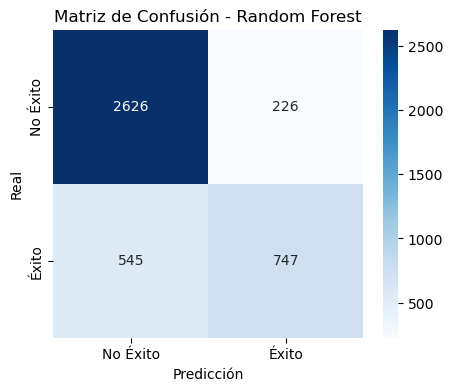


Entrenando modelo: Gradient Boosting...
Precisión del modelo Gradient Boosting: 0.7922
              precision    recall  f1-score   support

    No Éxito       0.81      0.90      0.86      2852
       Éxito       0.72      0.54      0.62      1292

    accuracy                           0.79      4144
   macro avg       0.77      0.72      0.74      4144
weighted avg       0.79      0.79      0.78      4144



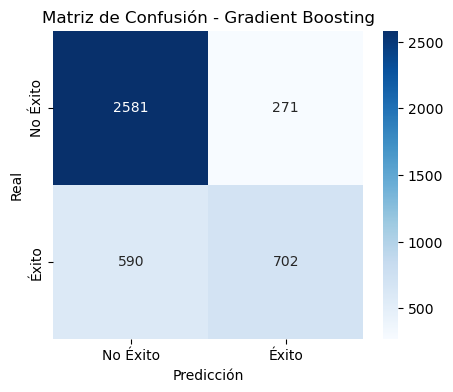


Entrenando modelo: Decision Tree...
Precisión del modelo Decision Tree: 0.7292
              precision    recall  f1-score   support

    No Éxito       0.81      0.80      0.80      2852
       Éxito       0.56      0.57      0.57      1292

    accuracy                           0.73      4144
   macro avg       0.69      0.69      0.69      4144
weighted avg       0.73      0.73      0.73      4144



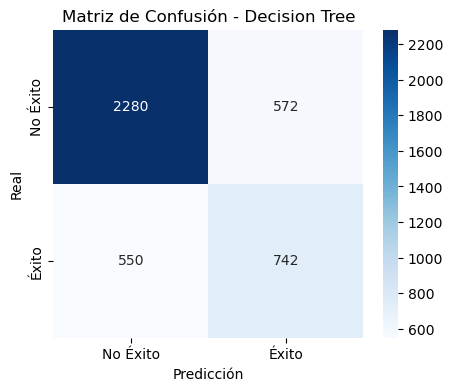


Entrenando modelo: SVM...
Precisión del modelo SVM: 0.7835
              precision    recall  f1-score   support

    No Éxito       0.78      0.95      0.86      2852
       Éxito       0.79      0.42      0.55      1292

    accuracy                           0.78      4144
   macro avg       0.79      0.68      0.70      4144
weighted avg       0.78      0.78      0.76      4144



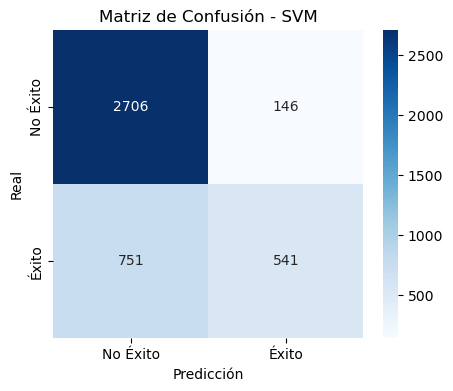

In [39]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"\nEntrenando modelo: {name}...")
    
    if name == "SVM":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["No Éxito", "Éxito"], output_dict=True)
    
    results[name] = {
        "Accuracy": accuracy,
        "Report": report,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }
    
    print(f"Precisión del modelo {name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, target_names=["No Éxito", "Éxito"]))

    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Éxito", "Éxito"], yticklabels=["No Éxito", "Éxito"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

### Paso 6: Selección del mejor modelo basado en la mejor precisión

In [46]:
best_model = max(results, key=lambda k: results[k]["Accuracy"])
print(f"\nEl mejor modelo es: {best_model} con una precisión de {results[best_model]['Accuracy']:.4f}")


El mejor modelo es: Random Forest con una precisión de 0.8139
